### Where SVM gets incredibly exciting is when it is used in conjunction with kernels. To motivate the need for kernels, let's look at some data which is not linearly separable:

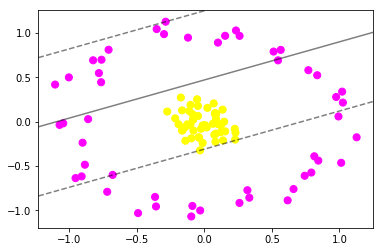

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from svmPlot import plot_svc_decision_function
from sklearn.svm import SVC # "Support vector classifier"

from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

### Clearly, no linear discrimination will ever separate these data. One way we can adjust this is to apply a kernel, which is some functional transformation of the input data.

In [2]:
#For example, one simple model we could use is a radial basis function
#If we plot this along with our data, we can see the effect of it:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d
from IPython.html.widgets import interact

plt.figure()
def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D)

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30)>

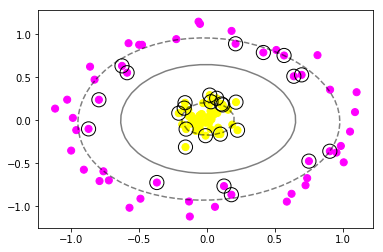

In [3]:
#We can see that with this additional dimension, the data becomes trivially linearly separable!
#This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. 
#This is accomplished by using kernel='rbf, short for radial basis function:
clf = SVC(kernel='rbf')
clf.fit(X, y)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='black');